# Анализ закономерностей успешности компьютерных игр

 __Цель исследования:__ выявление определяющих успешность игры закономерностей, для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br> 
<br>
__Данные исследования:__ данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года.
<br>
__Примечание__: в наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">Шаг 1. Изучение общей информации</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">Шаг 2. Подготовка данных</a></li>
    <li><a style="text-decoration: none" href="#analysis">Шаг 3. Проведение исследовательского анализа данных</a></li>
    <li><a style="text-decoration: none" href="#portrait">Шаг 4. Составление портрета пользователя каждого региона</a></li>
    <li><a style="text-decoration: none" href="#hypothesis">Шаг 5. Проверим гипотезы</a></li>
    <li><a style="text-decoration: none" href="#conclusion">Шаг 6. Общий вывод</a></li>
</ul>

# Изучение общей информации <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import plotly.express as px

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю новый DataFrame __data_game__ 

In [2]:
data_game = pd.read_csv("/datasets/games.csv")

Создаю функцию для получения основной информации о датафрейме

In [3]:
#функция для получения основной информации о датафрейме
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#запускаем функцию
data_describe(data_game)

#смотрим пропуски в процентном соотношении
pd.DataFrame(round((data_game.isna().mean()*100),2)).style.background_gradient('coolwarm')

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Получаем следующую структуру таблицы __``data_game``__:
 
    * Количество столбцов: __11__
    * Количество строк: __16715__
    * Тип данных в столбцах: __float64(6), object(5)__

Подробно разберём, какие в __``data_game``__ столбцы и какую информацию они содержат:
* __Name__ — название игры
* __Platform__ — платформа
* __Year_of_Release__ — год выпуска
* __Genre__ — жанр игры
* __NA_sales__ — продажи в Северной Америке (миллионы проданных копий)
* __EU_sales__ — продажи в Европе (миллионы проданных копий)
* __JP_sales__ — продажи в Японии (миллионы проданных копий)
* __Other_sales__ — продажи в других странах (миллионы проданных копий)
* __Critic_Score__ — оценка критиков (максимум 100)
* __User_Score__ — оценка пользователей (максимум 10)
* __Rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

###### Выводы

Каждая строка таблицы содержит информацию об игре, об ее продажах на разных континентах и ее оценку критиков и пользователей.  
На основе полученного анализа пропусков можно сделать вывод, что огромное количество пропусков наблюдается в столбцах Critic_Score (51,41%), User_Score (40,09%) и Rating (40,49%). Незначительное колиство пропусков  наблюдается в столбцах Name (0,01%), Year_of_Release (1,61%) и Genre (0.01%). В следующем разделе займемся подготовкой данных для исследований. Три проблемы, которые нужно решать: пропуски, некачественные названия столбцов и <b>преобразование данных в нужные типы</b>.

# Подготовьте данные <a name="data_pre-processing"></a>

##### Задача 2.1. Замените названия столбцов (приведите к нижнему регистру).

Получаем перечень названий столбцов и приведем их названия все к нижнему регистру

In [4]:
data_game.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приводим все названия столбцов к нижнему регистру и проверяем это.

In [5]:
data_game.columns = data_game.columns.str.lower()
data_game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#####  Задача 2.2. Преобразование данных в нужные типы. 

Исходя из данных таблиц выявлена была потребность в преобразовании только одного столбца year_of_release из float64 в datetime64.   

In [6]:
#Применим функцию
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо перевести столбец __user_Score__ из __object__ в __float64__, но для этого нужно заменить пропущенные значения в данном столбце. Поэтому замена типа будет произведена после того как избавимся от пустых ячеек.

#####  Задача 2.3. Обработка пропусков

Пропущенные значения, которые составляют меньше 2% спокойно удалим, так как они никак не повлияют на нашу выборку. 

In [7]:
#удаляем все необходимые пропуски
data_game.dropna(subset=['name', 'year_of_release', 'genre'],inplace=True)

#меняем тип столбца year_of_release
data_game["year_of_release"] = data_game["year_of_release"].astype(int)

Столбец user_score мы не можем перевести в числовой, хотя по логике вещей он относиться к числовым. Связано это с тем, что в данном столбце встречается значение __tbd__, что  значит to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом. Поэтому мы просто заменяем все значения на NaN. Затем все пропуски заменяем на 0 и переводим тип столбца из object в тип float

In [8]:
#меняем tbd на Nan
data_game['user_score'] = data_game['user_score'].replace('tbd', np.nan, regex=True)
#переводим столбец user_score из object в float  
data_game['user_score'] = pd.to_numeric(data_game['user_score'], errors='coerce')
#проверяем
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Рассмотрим корреляцию между пропущенными значениями. В принципе мы видим, что существует сильная связь между значениями critic_score и user_score. То есть можно говорить о том, что между данными столбцами сущесвует определенная связь.

In [9]:
data_game.corr().style.background_gradient('coolwarm')

И если мы посмотрим в таблицу, то увидим, что большая часть данных пропущены в тех и других значениях. В связи с этим принимаю решение не менять подобные значения вообще. Так как иначе получится, что у большей части игр нулевой рейтинг. Поэтому значения мы ничем не заменяем. 

In [10]:
data_game.loc[data_game["critic_score"].isnull()&data_game["user_score"].isnull()].count()

name               7892
platform           7892
year_of_release    7892
genre              7892
na_sales           7892
eu_sales           7892
jp_sales           7892
other_sales        7892
critic_score          0
user_score            0
rating             1312
dtype: int64

По четырем столбцам приведем значения к нижнему регистру

In [11]:
for column in data_game[['name','platform','genre','rating']]:
    data_game[column] = data_game[column].str.lower()

В заключении были подсчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

In [12]:
data_game["total_revenue"] = data_game["na_sales"] + data_game["eu_sales"] + data_game["jp_sales"] + data_game["other_sales"]

#####  Выводы
Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и привели к правильным типам данных необходимые столбцы.
Имеются пустые значения в столбцах rating, user_score, critic_score. В связи с тем, что большая часть данных пропущены в тех и других значениях, мною было принято решение не заменять пропущенные значения, за исключением некоторых случаев. А именно если есть одно значение в столбцах critic_score или user_score, то мы заменяем пропущенные значения в столбце user_score на частное значение  critic_score на среднюю разницу между этими оценками, которое составило 10,1, а в столбце critic_score на произведение значений столбца user_score  на среднюю разницу между этими оценками.

# Проведение исследовательского анализа данных <a name="analysis"></a>

Для начало рассмотрим количество игр выпускаемых по годам.  Для этого мы построим сводную таблицу с помощью применения метода __pivot_table()__ по столбцу __year_of_release__ . Затем на основе сводной таблицы построим столбчатую гистограмму с помощью использования библиотеки __seaborn__. На основе анализа выпуска игр можно сказать, что пик выпуска игр пришелся на 2008 и 2009 год,когда начали появляться компьютеры практически в каждой семье. При этом затем можно наблюдать спад количества выпущенных игр, начиная с 2011 года, что обусловлено активным развитием мобильных игр. 

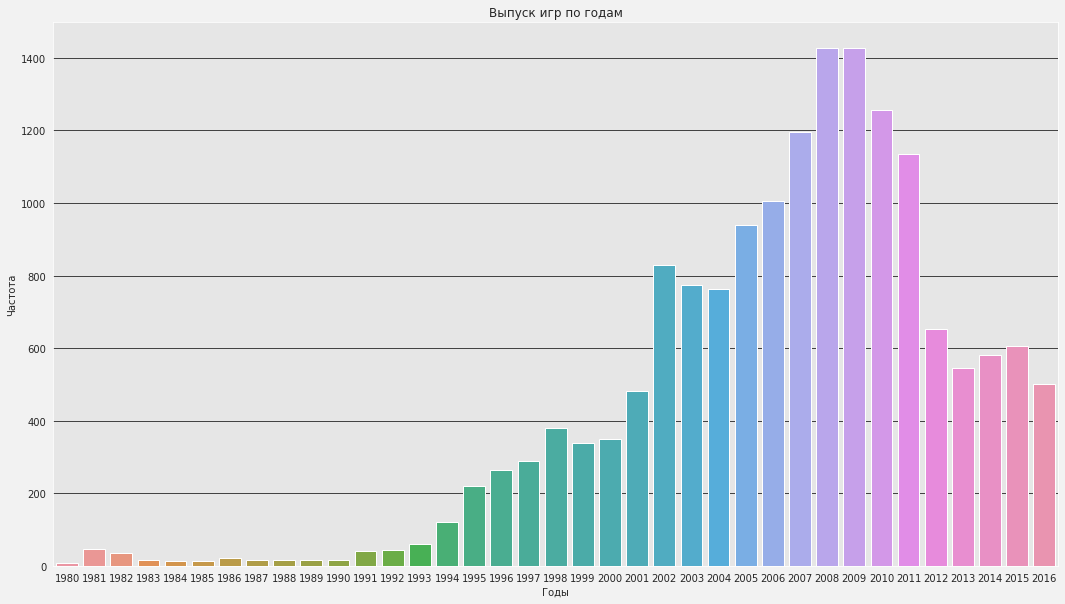

In [13]:
#строим сводную таблицу
data_year = data_game.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()#создаем сводную таблицу

#с помощью использования библиотеки seaborn строим столбчатую гистограмму
sns.set_style('darkgrid',#задаем стили графикам
            {'axes.facecolor': '0.9',
            'grid.color': '0.1',
            'figure.facecolor': '0.95'})
    
plt.figure(figsize=(18,10))
sns.barplot(data=data_year, x='year_of_release', y='name')
plt.title("Выпуск игр по годам")
plt.xlabel("Годы")
plt.ylabel("Частота");
    
    

Затем посмотрим как менялись продажи по платформам.  Для этого мы построим сводную таблицу с помощью применения метода __pivot_table()__ по столбцу __platform__ и посчитаю суммарные продажи с помощью метода __.sum()__. Затем на основе сводной таблицы построим столбчатую гистограмму с помощью использования библиотеки __seaborn__. Исходя из полученных результатов можно говорить, что основными платформами по суммарным продажам являются следующие платформы:
- ps2;
- x360;
- ps3;
- wii;
- ds.
С помощью построения распределения по годам мы посмотрели тенденцию появления новых и исчезновению старых платформ. В среднем самые прибыльные платформы начали появляться с 2006 года и пик их пришелся на самые популярные года 2008 и 2009 год. Популярность платформы где-то в среднем держится три-четыре года, затем она идет на спад. Платформа в среднем живет около 10-15 лет.

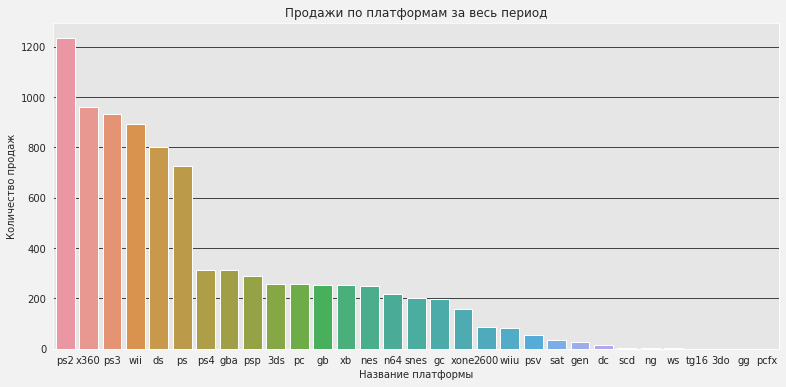

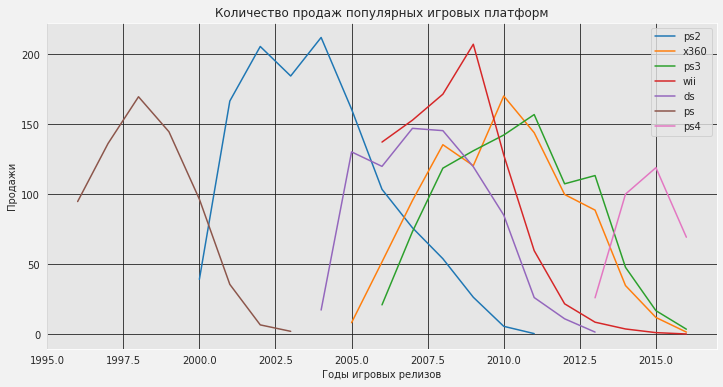

In [14]:
#Создаем сводную таблицу по столбцу platform и посчитаем суммарные продажи по каждой платформе 
game_platform = data_game.pivot_table(index='platform', values='total_revenue', aggfunc='sum').sort_values(by='total_revenue', ascending=False).reset_index()

#Строим гистограмму по суммарным продажам по платформам
plt.figure(figsize=(13,6))
sns.barplot(data=game_platform, x='platform', y='total_revenue')
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

#делаем срез по шести самым популярным платформам
top_platforms = game_platform.head(7)


#делаем функцию которая нам построит сводную таблицу по конкретной платформе и посчитаем суммарные продажи по каждой популярной платформе после 1995 года
def data_slice(data, plat_name):
    return data.query('platform == @plat_name and year_of_release>1995').pivot_table(index="year_of_release", values="total_revenue", aggfunc="sum") 



plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')   
for i in list(top_platforms['platform']):#делаем цикл, чтобы  были получены данные по самым популярным платформам
    sns.lineplot(data=data_slice(data_game, i)['total_revenue'], label=i)#строим линейную гистограмму
    plt.legend()

In [15]:
fig = px.line(data_game.query('year_of_release > 2006').pivot_table(index = ['platform', 'year_of_release'], values = 'total_revenue', aggfunc = 'sum').reset_index(),
             x = 'year_of_release', y = 'total_revenue', color = 'platform', title = 'Изменение суммарных продаж с 2006 года')
fig.show()

На графике выше видно, что данная отрасль является очень динамичной, а средний возраст платформы составляет 7 лет, при этом при выходе новой платформы сразу же падают продажи игр на старых платформах, поэтому нам достаточно взять данные с __2013 года__. К тому же, учитывая, что средний срок жизни платформ около 7 лет, половина которого уходит на рост, другая на падение, можно предположить, что PS4 \ XOne будут актуальным только до 2020 года. Построим датафрейм, который нам будет показывать данные с 2013 года. На основе полученных данных получим топ-10 самых продаваемых платформ после 2013 года.

In [16]:
#Получаем данные после 2013 года
actual_data = data_game.query('year_of_release > 2013')
#Находим самые популярные платформы после 2013 года
top_platform = actual_data.pivot_table(index='platform', values='total_revenue', aggfunc='sum').sort_values(by='total_revenue', ascending=False).reset_index()
top_platform = top_platform.head(7)
top_platform

platform  total_revenue
0      ps4         288.15
1     xone         140.36
2      3ds          86.68
3      ps3          68.18
4     x360          48.22
5     wiiu          42.98
6       pc          27.05

Затем построим график «ящик с усами» по глобальным продажам игр в разбивке по наиболее популярным платформам. Рассматривались только результаты после __2013 года__, именно эти данные помогут построить прогноз на 2017 год.<br>
Исходя из полученных данных можно увидеть, что наиболее прибыльными платформами с 2013 года являются платформы __X360__ (медиана - 0,17), __xone__ (медиана - 0,15), __wiiu__ (медиана - 0,15). То есть в среднем одна игра на данной платформе получает прибыли больше, чем игры на других платформах. Но здесь необходимо уточнить, что __PS4__  появилась в 2013 году и она пока только начала набирать обороты, это же касается __xone__.

In [17]:
#создаем новую таблицу, в которой будут самые популярные  платформы
sales_platforms = actual_data[actual_data['platform'].isin(['ps4','xone','3ds','ps3','x360', 'wiiu', 'pc'])] 
#избавляемся от выбросов и всех данных до 2005 года
sales_platforms = sales_platforms.query("total_revenue < 1.8")

#строим "ящики с усами"
fig = px.box(sales_platforms, x='platform', y='total_revenue', title="Ящик с усами")
fig.show()

Теперь посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. За основу возьмем платформу ps4. Исходя из полученных данных можно говорить, что количество продаж платформы зависит больше от отзывавов критиков.

In [18]:
#создадим таблицу с данными только по платформе ps3
ps4_platform = actual_data.query('platform=="ps4"') 
#Ищем корреляцию между отзывами критиков и количеством продаж платформы
corr_critic = ps4_platform['total_revenue'].corr(ps4_platform['critic_score'])
#Ищем корреляцию между отзывами пользователей и количеством продаж платформы
corr_user =  ps4_platform['total_revenue'].corr(ps4_platform['user_score'])
print('Корреляция между отзывами критиков и количеством продаж платформы', corr_critic)
print('Корреляция между отзывами пользователей и количеством продаж платформы', corr_user)
#сделаем корреляцию по всем столбцам.
ps4_platform.corr().style.background_gradient('coolwarm')



Корреляция между отзывами критиков и количеством продаж платформы 0.40266141068104083
Корреляция между отзывами пользователей и количеством продаж платформы -0.040131589472697356


Построим диаграммы рассеивания по столбцам __user_score__ и __critic_score__. В целом диаграмма рассеивания показывает зависимость от оценки пользователей и оценки критиков, то чем больше оценка, тем больше продаж у игры.

In [19]:
#Строим диаграмму рассеивания по столбцу user_score и total_revenue
fig = px.scatter(ps4_platform, x='user_score', y='total_revenue', title="Диаграмма рассеивания между оценкой пользователей и доходностью")
fig.show()
#plt.figure(figsize=(12,6))
#sns.scatterplot(x='user_score', y='total_revenue', data=ps4_platform)
#plt.title('test');

#Строим диаграмму рассеивания по user_score и total_revenue 
fig = px.scatter(ps4_platform, x='critic_score', y='total_revenue', title="Диаграмма рассеивания между оценкой критиков и доходностью")
fig.show()
#plt.figure(figsize=(12,6))
#sns.scatterplot(x='critic_score', y='total_revenue', data=ps4_platform)
#plt.title('test');

Для того, чтобы соотнести выводы с продажами игр на других платформах, мы построим по  самым популярным платформам диаграммы рассеивания. Для этого напишем функцию, которая будет нам выводить диаграммы. Для одновременной выдачи нескольких графиков в различных частях графического окна мы будем использовать __subplot__. Также произведем расчеты корреляции между отзывами критиков и пользователей и количеством продаж платформы.
На основе полученного вывода можно сделать заключение, что коэффициенты корреляций относительно невысокие, однако все же по критикам корреляция куда выше, нежели по пользователям. По некоторым платформам корреляция по отзывам пользователей является отрицательной (ps4, xone, pc) и близка к нулю. То есть можно утверждать, что на доходность игр умеренно влияет оценка критиков, а оценка пользователей никак не влияет. Исключение здесь составляет только одна платформа - WIIU.

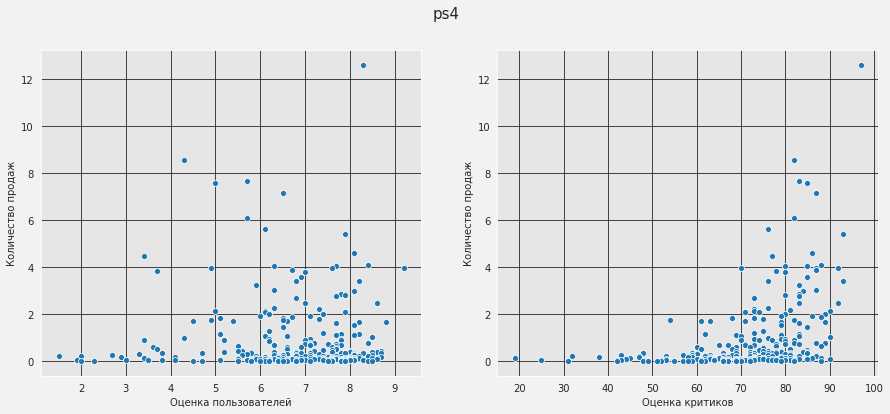

Корреляция между отзывами критиков и количеством продаж платформы ps4 : 0.41
Корреляция между отзывами пользователей и количеством продаж платформы:  ps4 : -0.03


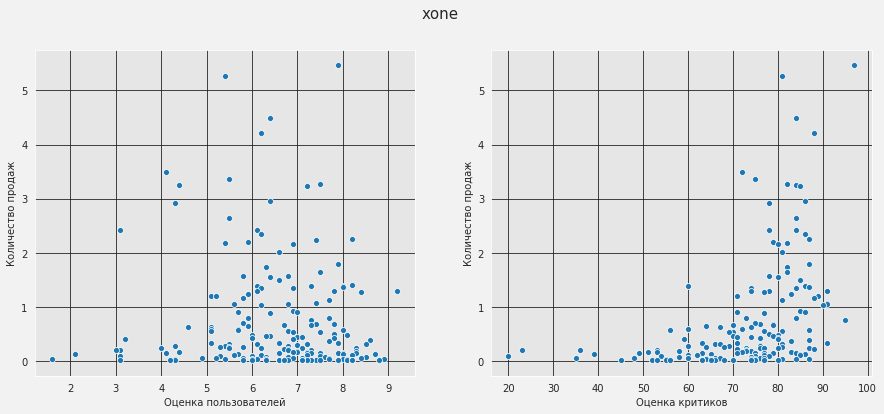

Корреляция между отзывами критиков и количеством продаж платформы xone : 0.42
Корреляция между отзывами пользователей и количеством продаж платформы:  xone : -0.07


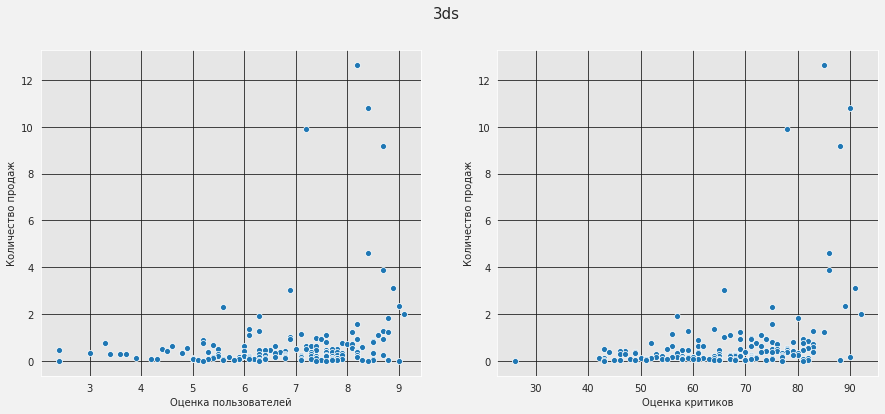

Корреляция между отзывами критиков и количеством продаж платформы 3ds : 0.35
Корреляция между отзывами пользователей и количеством продаж платформы:  3ds : 0.22


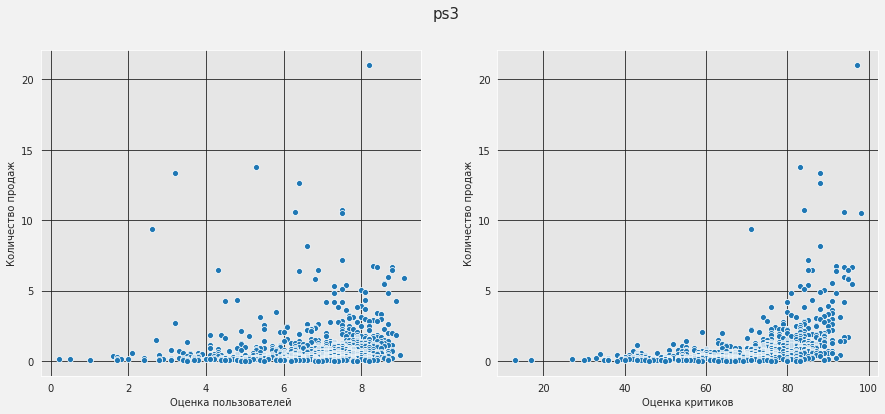

Корреляция между отзывами критиков и количеством продаж платформы ps3 : 0.43
Корреляция между отзывами пользователей и количеством продаж платформы:  ps3 : 0.13


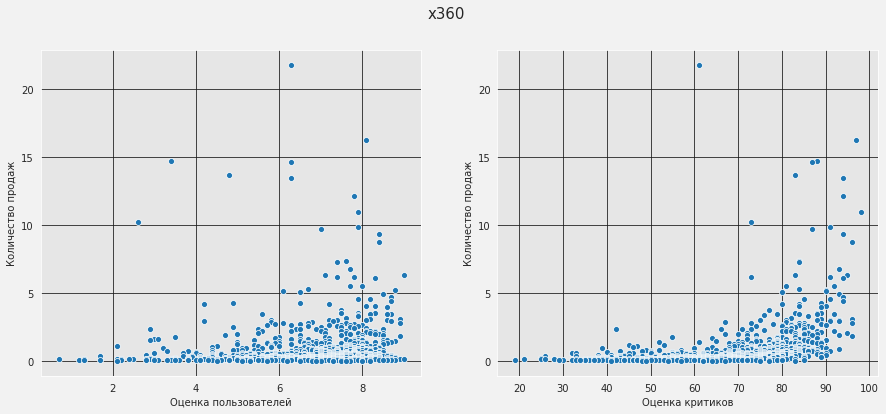

Корреляция между отзывами критиков и количеством продаж платформы x360 : 0.40
Корреляция между отзывами пользователей и количеством продаж платформы:  x360 : 0.12


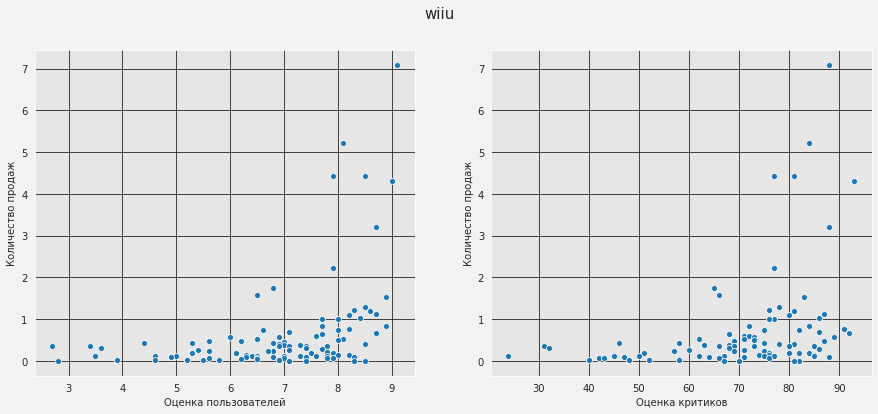

Корреляция между отзывами критиков и количеством продаж платформы wiiu : 0.35
Корреляция между отзывами пользователей и количеством продаж платформы:  wiiu : 0.40


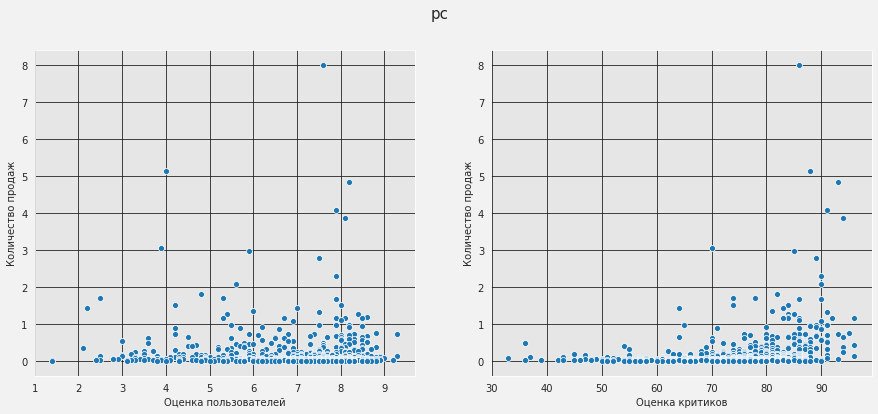

Корреляция между отзывами критиков и количеством продаж платформы pc : 0.29
Корреляция между отзывами пользователей и количеством продаж платформы:  pc : -0.02


In [20]:
#строим функцию, которая строит диаграмму рассеивания по столбцам user_score и critic_score  
def scatterplot_matrix(name_platform):
    platform = data_game.query('platform==@name_platform and year_of_release > 2005') 
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))#создаем два строчки
    sns.scatterplot(x='user_score', y='total_revenue', data=platform, ax=axes[0])
    sns.scatterplot(x='critic_score', y='total_revenue', data=platform, ax=axes[1])
    fig.suptitle(name_platform, fontsize=15)
    axes[0].set(xlabel='Оценка пользователей')
    axes[1].set(xlabel='Оценка критиков')
    axes[0].set(ylabel='Количество продаж')
    axes[1].set(ylabel='Количество продаж')
    plt.show()
    #Ищем корреляцию между отзывами критиков и количеством продаж платформы
    corr_critic = platform['total_revenue'].corr(platform['critic_score'])     
    #Ищем корреляцию между отзывами пользователей и количеством продаж платформы
    corr_user = platform['total_revenue'].corr(platform['user_score'])
    #Выводим полученные значения на экран
    print("Корреляция между отзывами критиков и количеством продаж платформы",  name_platform, ': {:.2f}'.format(corr_critic))
    print("Корреляция между отзывами пользователей и количеством продаж платформы: ",  name_platform, ': {:.2f}'.format(corr_user))
    

#Через цикл выводит диаграммы рассеивания по самым популярным платформам   
for platform in list(top_platform['platform']):
    scatterplot_matrix(platform)
    

Ради интереса посчитали среднее, дисперсию и стандартное отклонение исходя из среднего значения по общим доходам. Для этого мы построили функцию, которая будем считать среднее значение, дисперсию и стандартное отклонение по заданному датафрейму. В принципе полученные данные коррелируются с ящик с усами. Самые большие средние у платформ __ps4__ и __x360__.

In [21]:
#Пишем функцию, которая будет нам считать среднее значение, дисперсию и стандартное отклонение
def find_indicators(name_platform, row):
    platform = data_game.query('platform==@name_platform and year_of_release > 2005') 
    mean = platform[row].mean()#рассчитываем среднее
    variance = np.var(platform[row], ddof=1)#рассчитываем дисперсию
    standard_deviation = np.sqrt(variance)#рассчитываем стандартное отклонение
    print('Данные по дисперсии, среднему значению  и стандартному отклонению по платформе', name_platform)
    print('Среднее значение платформы {:.2f}'.format(mean))#выводим среднее значение                       
    print('Дисперсия платформы {:.2f}'.format(variance))#выводим дисперсию
    print('Стандартное отклонение платформы {:.2f}'.format(standard_deviation))#стандартное отклонение
    print('')


#Через цикл выведем наиболее популярные платформы    
for platform in list(top_platform['platform']):
    find_indicators(platform, 'total_revenue')  

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе ps4
Среднее значение платформы 0.80
Дисперсия платформы 2.59
Стандартное отклонение платформы 1.61

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе xone
Среднее значение платформы 0.65
Дисперсия платформы 1.07
Стандартное отклонение платформы 1.04

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе 3ds
Среднее значение платформы 0.50
Дисперсия платформы 2.08
Стандартное отклонение платформы 1.44

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе ps3
Среднее значение платформы 0.71
Дисперсия платформы 1.97
Стандартное отклонение платформы 1.40

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе x360
Среднее значение платформы 0.79
Дисперсия платформы 2.70
Стандартное отклонение платформы 1.64

Данные по дисперсии, среднему значению  и стандартному отклонению по платформе wiiu
Среднее значение пл

Затем рассмотрим общее распределение игр по жанрам. 
- Самые прибыльные жанры это action, shooter и  sports. Наименее востребованные жанры strategy, puzzle. 
- Самые выпускаемые жанры это action, данный жанр вне конкуренции. Меньше всего выпускают strategy, puzzle.
- Самые высокие продажи за игру у shooter, в данном случае он вне конкуренции. Наименьшие продажи за игру у strategy, adventure.

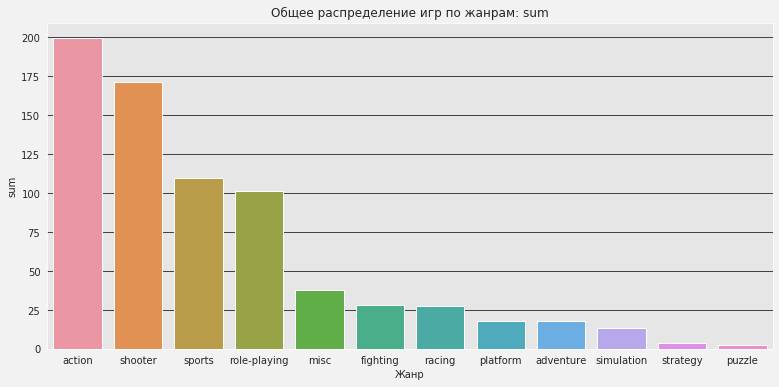

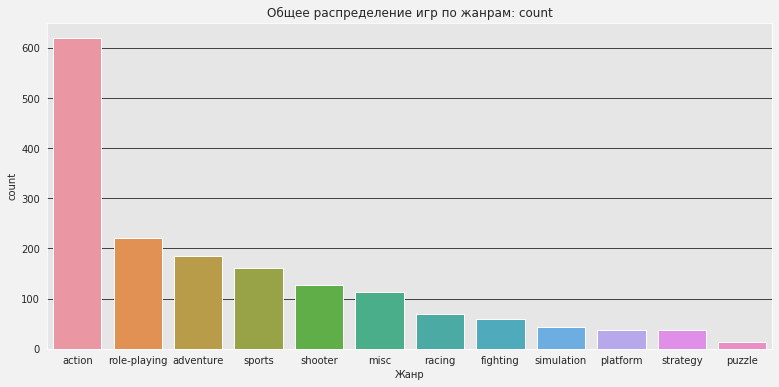

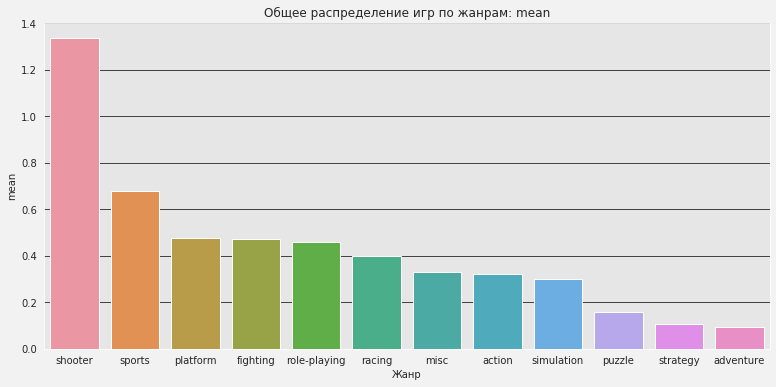

In [22]:
#Напишем функцию, которая нам будет строить столбчатые гистограммы на основе трех методов sum, count и mean. 
def build_bar(func):
    data = actual_data.pivot_table(index='genre', values='total_revenue', aggfunc=func).reset_index().sort_values(by="total_revenue", ascending=False)
    plt.figure(figsize=(13,6))
    sns.barplot(data=data, x='genre', y='total_revenue')
    plt.title("Общее распределение игр по жанрам: " + func)
    plt.xlabel("Жанр")
    plt.ylabel(func);

arr = ["sum", "count", "mean"]

#Через цикл запускаем функцию
for a in arr: 
    build_bar(a)

##### Выводы:

На основе полученного анализа можно сделать следующий вывод:
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 2001-2002 года и длился до пика 2008-2009 года, после чего количество выпускаемых игр пошло на спад, полагаю это может быть связано с разивтием мобильной индустрии, увеличением времени и средств на разработку игр.
- Самые популярные игровые платформы за весь анализируемый период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS.
- Игровая отрасль является очень динамичной, а средний возраст одной платформы составляет 7 лет, при этом при выходе новой платформы сразу же падают продажи игр на старых платформах, поэтому для составления прогноза взяли за основу данные с 2013 года.
- За последние четыре года самыми популярными платформами являются 'PS4','XONE' и '3DS'.
- Наиболее прибыльными платформами на основе построенных "ящиков  с усами" являются X360, XONE и WIIU.
- Коэффициенты корреляций относительно невысокие, однако все же по критикам корреляция куда выше, нежели по пользователям. 
- Самым прибыльным и выпускаемым жанром является action, а самые высокие продажи за игру у shooter.

# Составление портрета пользователя каждого региона <a name="portrait"></a>

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияние на рейтинг ESRB на продажи в отдельном регионе.

Здесь мы пропишем функцию, которая будет нам выводить графики по одной осевой линии, для это применим к построению графиков __subplot__. 
Исходя из полученных графиков составим портрет пользователя каждого региона за последние 10 лет и за последние 3 года. За последние 10 лет:
- у <b>пользователей в Северной Америке</b> самыми популярными игровыми платформами являются: X360, WII, PS3, DS и PS2.
Топ 5 жанров в северной америке за все время: action, sports, shooter, misc и role-playing.  По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".
- у  <b>пользователей в Европе.</b>Самыми популярными игровыми платформами является: PS3, X360, WII, DS, PS4.
Топ 5 жанров в северной америке за все время: action, sports, shooter, misc и racing. По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "для взрослых" и на третьем месте игры с рейтингом "от 13 и выше".  
- у <b>пользователей  в Японии.</b> Самыми популярными игровыми платформами является: DS, 3DS, PS3, PSP, WII.
Топ 5 жанров в северной америке за все время: role-playing, action, misc, sports и platform. По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше". 

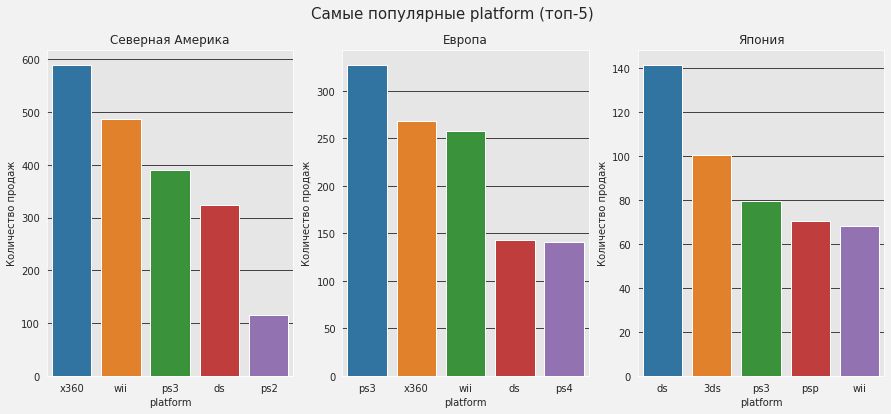

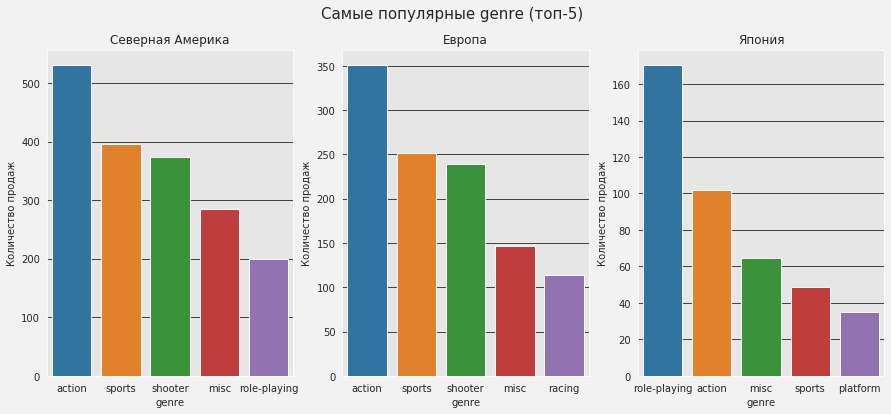

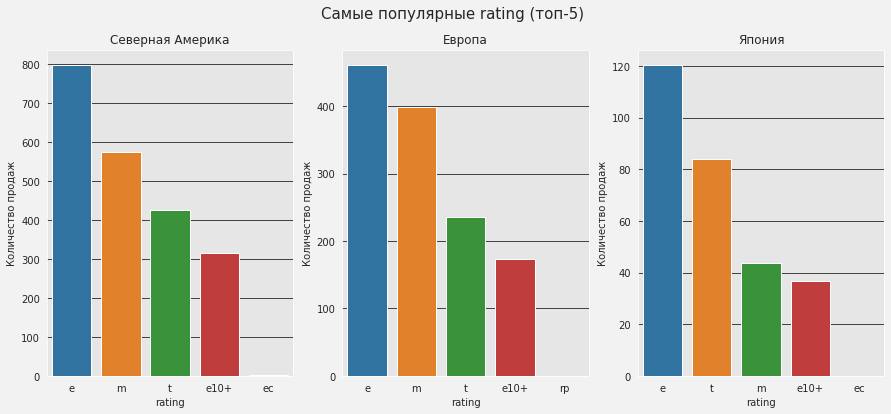

In [23]:
#пропишем функцию, которая будет нам выводить графики по одной осевой линии.
def user_profile(index, year):
    #стоим таблицу с необходимыми данными. 
    data = data_game.query('year_of_release > @year').pivot_table(index=index, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
    #отбираем по каждому региону список из пяти ведущих нужных показателей
    eu_sales = data.sort_values(by="na_sales", ascending=False).head(5)
    jp_sales = data.sort_values(by="eu_sales", ascending=False).head(5)
    na_sales = data.sort_values(by="jp_sales", ascending=False).head(5)
    #применяем subplots  и строим три графика в одну линию
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
    sns.barplot(x=index, y='na_sales', data=eu_sales, ax=axes[0])
    sns.barplot(x=index, y='eu_sales', data=jp_sales, ax=axes[1])
    sns.barplot(x=index, y='jp_sales', data=na_sales, ax=axes[2])
    fig.suptitle("Самые популярные " + index + " (топ-5)", fontsize=15)
    axes[0].set(xlabel=index)
    axes[0].set_title("Северная Америка")
    axes[1].set(xlabel=index)
    axes[1].set_title("Европа")
    axes[2].set(xlabel=index)
    axes[2].set_title("Япония")
    axes[0].set(ylabel='Количество продаж')
    axes[1].set(ylabel='Количество продаж')
    axes[2].set(ylabel='Количество продаж')
    plt.show()

#Через цикл выведем наиболее популярные платформы, жанры и рейтинги     
for i in ['platform', 'genre', 'rating']:
    user_profile(i, 2005)

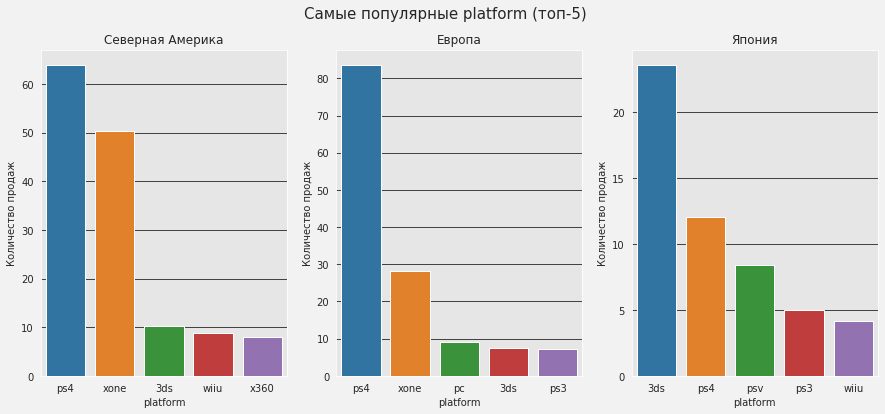

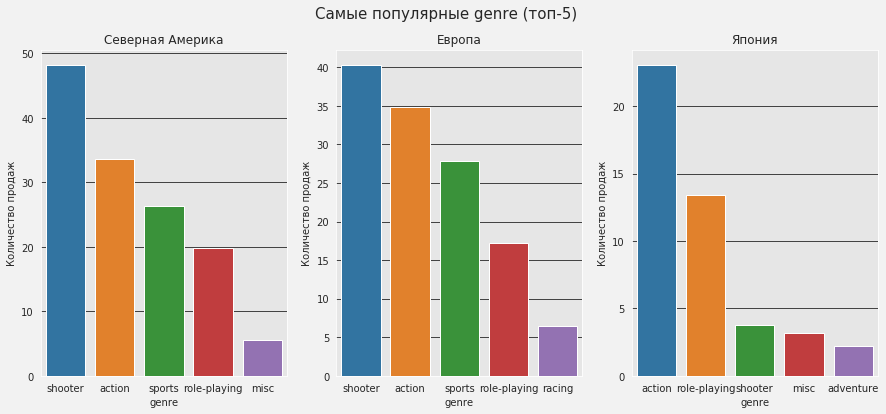

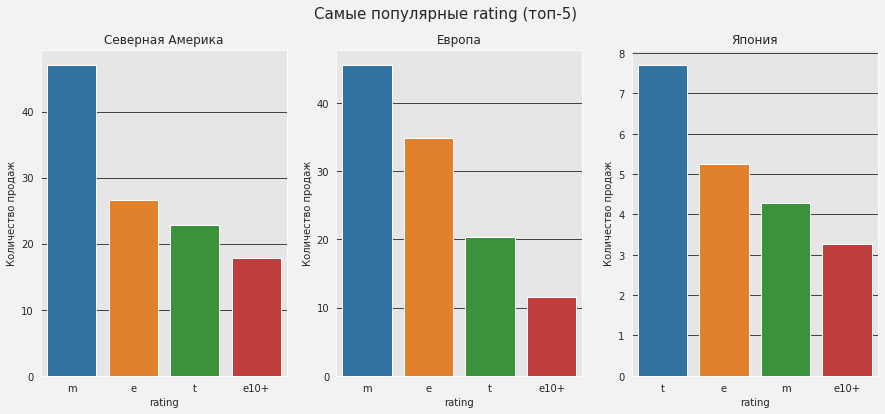

In [24]:
for i in ['platform', 'genre', 'rating']:
    user_profile(i, 2014)

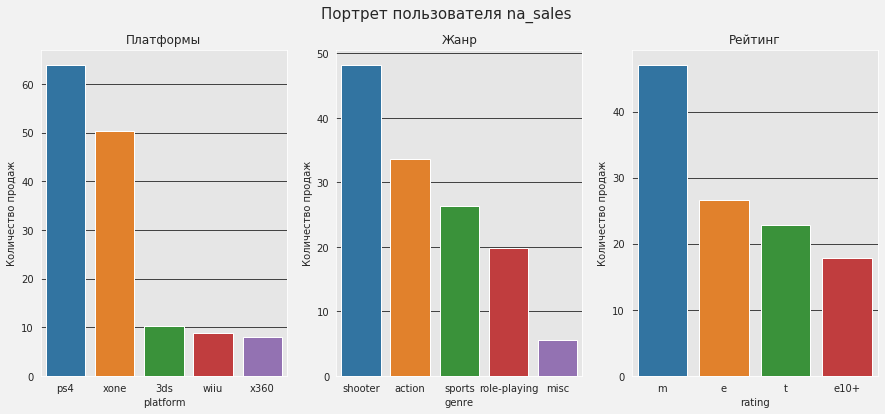

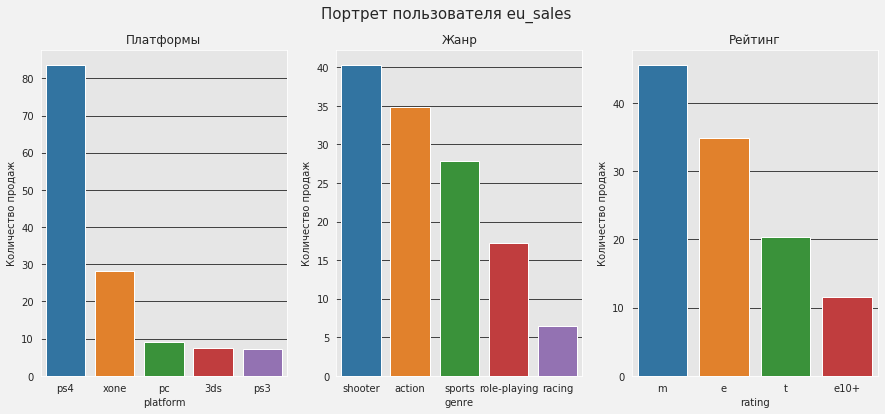

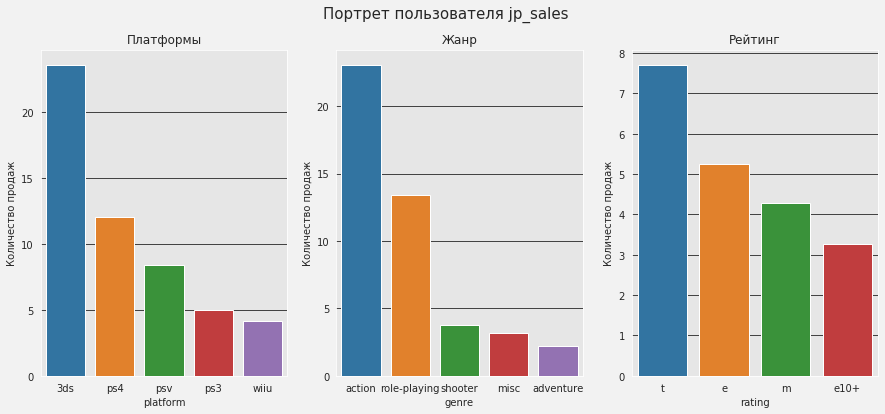

In [25]:
df = data_game.query('year_of_release > 2014')

def user_profile(region):
    data = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
    data1 = df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
    data2 = df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
    
    sales = data.sort_values(by=region, ascending=False).head(5)
    sales1 = data1.sort_values(by=region, ascending=False).head(5)
    sales2 = data2.sort_values(by=region, ascending=False).head(5)
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
    sns.barplot(x='platform', y=region, data=sales, ax=axes[0])
    sns.barplot(x='genre', y=region, data=sales1, ax=axes[1])
    sns.barplot(x='rating', y=region, data=sales2, ax=axes[2])
    fig.suptitle("Портрет пользователя " + region, fontsize=15)
    #axes[0].set(xlabel=index)
    axes[0].set_title("Платформы")
    #axes[1].set(xlabel=index)
    axes[1].set_title("Жанр")
    #axes[2].set(xlabel=index)
    axes[2].set_title("Рейтинг")
    axes[0].set(ylabel='Количество продаж')
    axes[1].set(ylabel='Количество продаж')
    axes[2].set(ylabel='Количество продаж')
    plt.show()

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    user_profile(region)

##### Выводы

- Полученные данные говорят о том, что предпочтения пользователей стремительно меняются, что показал анализ  пользователей за 10 лет и за 3 года. Сейчас популярна платформа __PlayStation 4__ во всех регионах, в Японии правда популярней платформа __Nintendo 3DS__. 
- По жанрам и по рейтингам пользователи в Америке и в Европе очень похожи друг на друга, в этих странах самые популярные игры в жанре __shooter__ (а раньше самым популярным жанром __action__). В Японии за последние три года самым популярным жанром стал __action__, он сдвинул на второе место __role_playning__.
- Произошел переход по популярности игр с рейтингом __"для всех"__ в сторону рейтинга __"от 17 и выше"__ (для Европы и Америке) и  __"от 13 и выше"__ (Япония).  


# Проверка гипотез <a name="hypothesis"></a>

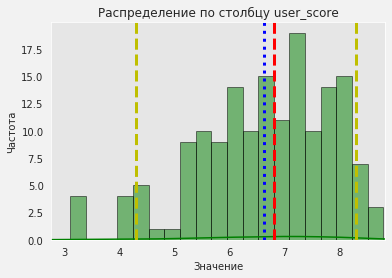

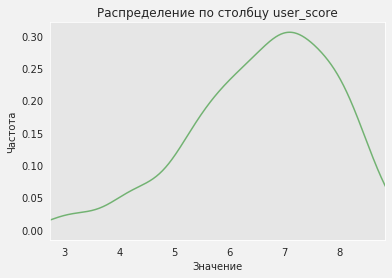

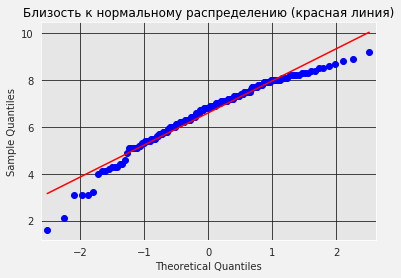

--------------------------------------------------------------


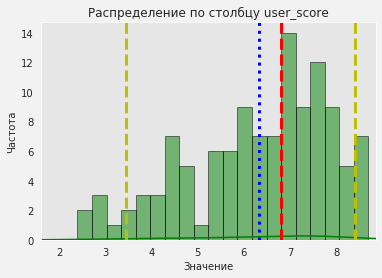

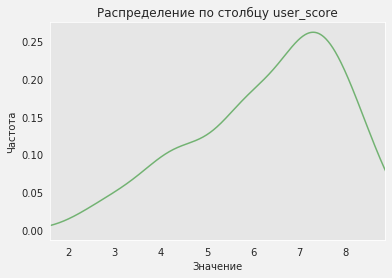

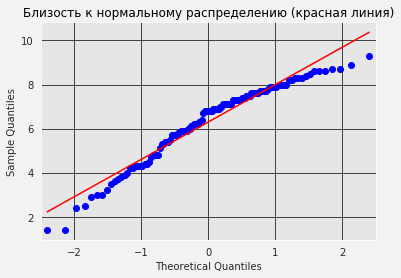

--------------------------------------------------------------


In [26]:
#Сделаем функцию которая отобразит нужное количество корзин
def my_bins(df,value):
    if df[value].max() > 100:
        return 50
    elif df[value].max() > 500:
        return 100
    elif df[value].max() > 1000:
        return 200
    else: return 20

#Сделаем функцию которая будет нам отображать три графика    
def my_hist(df, col):
    coef_bins = 0.005
    X_1 = df.loc[(df[col] >= df[col].quantile(.01))&(df[col] <= df[col].quantile(.99)),col]
    plt.figure(figsize =(6, 4))
    hist = X_1.plot(#Первый график
                kind='hist',
                bins=my_bins(df, col),
                alpha=0.5,
                ec='black',
                color='green',
    )
    X_1.plot(kind='kde', color='g')
    plt.axvline(x=X_1.median(),#Медиана
                linewidth=3,
                color='red',
                linestyle='--')
    plt.axvline(x=X_1.mean(),#Среднее
                linewidth=3,
                color='b',
                linestyle=':')
    plt.axvline(x=X_1.quantile(.05),#Квантиль 5%
                linewidth=3,
                color='y',
                linestyle='--')
    plt.axvline(x=X_1.quantile(.95),#Квантиль 95%
                linewidth=3,
                color='y',
                linestyle='--')
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    plt.figure(figsize =(6, 4))
    X_1.plot(kind='kde',#Второй график
    alpha=0.5,
    color='green',
    )
    plt.xlim(df[col].quantile(.01), df[col].quantile(.99))
    plt.title('Распределение по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()
    #Проверка на нормальность распределения;
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[col], line='s')
    plt.title('Близость к нормальному распределению (красная линия)', fontsize=12, color='black')
    plt.show()
    print('--------------------------------------------------------------')

#создаем данные по платформе Xbox One
platform_xb = actual_data.query('platform=="xone"')[["user_score"]]
#удаляем пропущенные значения
platform_xb = platform_xb.dropna()

#создаем данные по платформе PC
platform_pc = actual_data.query('platform=="pc"')[["user_score"]]
#удаляем пропущенные значения
platform_pc = platform_pc.dropna()

my_hist(platform_xb, "user_score")
my_hist(platform_pc, "user_score")

<br>Проведем тест Шапиро-Уилка, где<br> 
<b>H0</b> - данные распределены нормально<br>
<b>H1</b> - данные распределены не нормально<br>
Исходя из полученных данных можем сделать вывод что данные распределены не нормально


In [27]:
alpha = 0.05
statistic, pvalue = st.shapiro(platform_xb["user_score"])
print('p-значение:', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.564911119407043e-05
Отвергаем нулевую гипотезу


Также можем проверить дисперсию вручную, если разница меньше 5% - дисперсии считаем равными, и наоборот.<br>
На основе полученных данных дисперсии являются не равными.


In [28]:
def var_pr(df1, df2):
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return False
    else:
        return True

var_pr(platform_xb["user_score"], platform_pc["user_score"])    

False

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: <b>st.ttest_ind()</b>. При этом так как данные распределены не нормально, то установим <b>equal_var = False</b>, то есть считаем дисперсию наших двух выборок не равной. Этот аргумент <b>equal_var = false</b> делает этот конкретный вызов t-критерия равным t-критерию Уэлча.<br> 

<b>H0</b> - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
<b>H1</b> - cредние пользовательские рейтинги платформ Xbox One и PC являются не одинаковыми.<br>    


In [29]:
alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    platform_xb["user_score"], 
    platform_pc["user_score"],
    equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Полученное p-значение находится на довольно таки высоком уровне, что говорит о том, что мы не отбрасываем нулевую гипотезу. То есть предполагаем, что средние пользовательские рейтинги платформ __Xbox One__ и __PC__ статистически значимо не отличаются.

##### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сделаем проверку нормальность распределения данных.Будем использовать те же функции, которые мы создали для проверки первой гипотезы. Для начала построим срез по двум жанрам: action и sports, данные возьмем с <b>2005 года</b>. На основе построенных графиков распределения можно сделать вывод, что распределение является ненормальным по двум полученным данным. Их распределение смещено вправо.

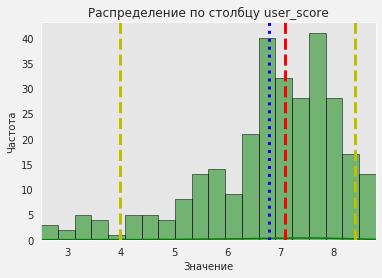

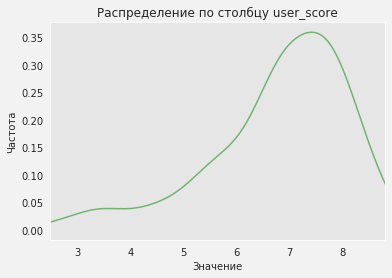

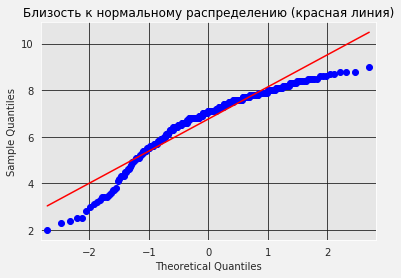

--------------------------------------------------------------


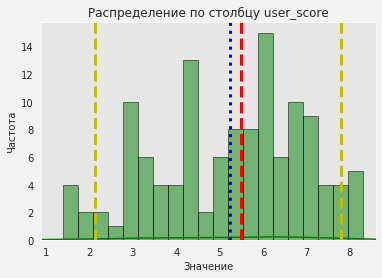

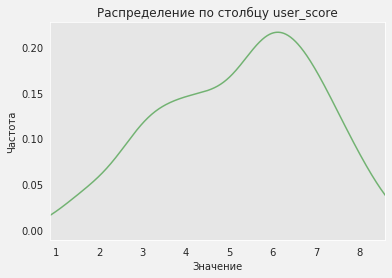

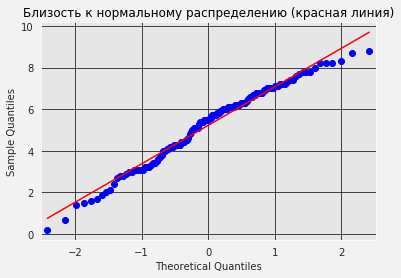

--------------------------------------------------------------


In [30]:
#создаем данные по платформе Xbox One
genre_action = actual_data.query('genre=="action"')[["user_score"]]
#удаляем пропущенные значения
genre_action = genre_action.dropna()

#создаем данные по платформе PC
genre_sports = actual_data.query('genre=="sports"')[["user_score"]]
#удаляем пропущенные значения
genre_sports = genre_sports.dropna()

my_hist(genre_action, "user_score")
my_hist(genre_sports, "user_score")

Проведем тест Шапиро-Уилка, где<br> 
<b>H0</b> - данные распределены нормально<br>
<b>H1</b> - данные распределены не нормально<br>
Исходя из полученных данных можем сделать вывод что данные распределены не нормально


In [31]:
alpha = 0.05
statistic, pvalue = st.shapiro(genre_action["user_score"])
print('p-значение:', pvalue)
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3703333173048504e-12
Отвергаем нулевую гипотезу


Также можем проверить дисперсию вручную, если разница меньше 5% - дисперсии считаем равными, и наоборот.<br>
На основе полученных данных дисперсии являются не равными.


In [32]:
var_pr(genre_action["user_score"], genre_sports["user_score"])  

False

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: <b>st.ttest_ind()</b>. При этом так как данные распределены не нормально, то установим <b>equal_var = False</b>, как и в случае проверки первой гипотезы. 

<b>H0</b> - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.<br>
<b>H1</b> - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.   


In [33]:
alpha = .05# критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    genre_action["user_score"], 
    genre_sports["user_score"],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


# Общий вывод  <a name="conclusion"></a>

Исходя из проведенного исследования нами были получены следующие выводы:
- Перед анализом данных, мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок и привели к правильным типам данных необходимые столбцы.
- Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2011 год. С 2011 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр
- За весь период консольных приставок самыми популярными оказались: PS2, X360, PS3, WII, DS, PS, а самые прибыльные X360, PS3.
- Игровая отрасль является очень динамичной, а средний возраст одной платформы составляет 7 лет, при этом при выходе новой платформы сразу же падают продажи игр на старых платформах, поэтому для составления прогноза взяли за основу данные с 2013 года. За последние четыре года самыми популярными платформами являются 'PS4','XONE' и '3DS'.
- Наиболее прибыльными платформами на основе построенных "ящиков  с усами" являются X360, XONE и WIIU.
- Проведя анализ оценок пользователей и критиков мною была выявлено то, что на продажу игры умеренно влияет оценка критиков, в то время как оценка пользователей никак не влияет, в некоторых случаях она является отрицательной.  
- Предпочтения пользователей стремительно меняются, что показал анализ предпочтений пользователей за 10 лет и за последние три года. Сейчас популярна платформа PlayStation 4 во всех регионах, кроме Японии, у нее самой популярной  платформой является  Nintendo 3ds. По жанрам и по рейтингам пользователи в Америке и в Европе очень похожи друг на друга, в этих странах самые популярные игры в жанре shooter (а раньше были игры в жанре action). В Японии стали больше играть в игры в жанре action. Произошел переход по популярности игр с рейтингом "для всех" в сторону рейтинга "от 17 и выше" (для Европы и Америке) и "от 13 и выше" (Японии).
- В рамках работы нами были проверены две гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. В первом случае мы не отвергнули нулевую гипотезу, а во втором случае нам пришлось отвергнуть нулевую гипотезу.